<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Xareny González López, José Alberto Mayagoitia Gutiérrez.

**Fecha:** 12 de octubre del 2021.

**Expediente** : if720811, if720266 .
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/Xarenyglp/Tarea5_XGONZALEZ_AMAYAGOITIA

# Tarea 5: Clase 9

> Para las siguiente dos funciones, genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 1000 muestras generadas con el método de la transformada inversa y compárela con el función $f(x)$ **(recuerde que $f(x)$ es la distribución de probabilidad y $F(x)$ es la distribución de probabilidad acumulada)** [ver este enlace para más información](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_distribuci%C3%B3n). Este procedimiento se realiza con el fín de validar que el procedimiento y los resultados son correctos.
    




> **Nota:** Por notación recuerde que para el caso continuo $f(x)$ es la distribución de probabilidad (PDF), mientras $F(x)$ corresponde a la distribución de probabilidad acumulada (CDF). Para el caso discreto, $P(X=i)$ corresponde a su distribución de probabilidad (PMF) y $ F_{X}(x)=\operatorname {P} (X\leq x)=\sum _{x_{i}\leq x}\operatorname {P} (X=x_{i})=\sum _{x_{i}\leq x}p(x_{i})$, corresponde a su distribución de probabilidad acumulada (CDF).


### Ejercicio 1: Generación variable aleatoria continua
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>

In [28]:
#import
import numpy as np
import matplotlib.pyplot as plt
import math

Código de solución estudiante 1

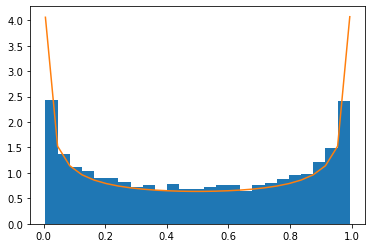

In [29]:
# Código de solución estudiante 1
import pandas as pd
N=10000
U=np.random.uniform(0.05,0.95, size=N)
y= lambda u: np.sin(np.pi*u/2)**2
H_inv_u=list(map(lambda u: y(u),U))

y,x,_=plt.hist(H_inv_u, bins=25, density=True);
f_x=(0.31831/(np.sqrt(1-x)*np.sqrt(x)))
plt.plot(x,f_x)


Código de solución estudiante 2

In [30]:
# Código de solución estudiante 2
N=10000
def mov_browniano(N):
    return (np.sin((np.random.uniform(0.05,0.95,N)*np.pi)/2))**2

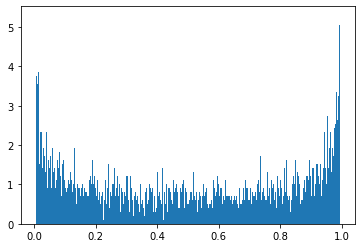

In [31]:
x=mov_browniano(N)
plt.hist(x,1000,density=True)
plt.show()

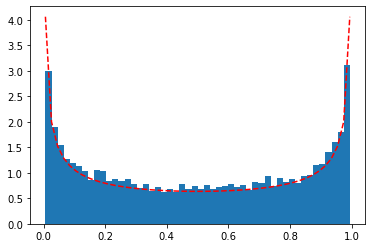

In [32]:
def plot_hist(N):
    y,x1,_=plt.hist(x,bins=50,density=True)
    y2 = 1/(np.pi*np.sqrt(x1)*np.sqrt(1-x1))
    plt.plot(x1,y2,'r--')
    plt.show()
plot_hist(N)

### Ejercicio 2: Generación variable aleatoria Discreta


> La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.
> Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como:
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

Código de solucion estudiante 1

In [33]:
# Código de solución estudiante 1
def p_max(N):
    return (np.sin(np.random.random(N)*np.pi/2))**2


0.49948000448510654


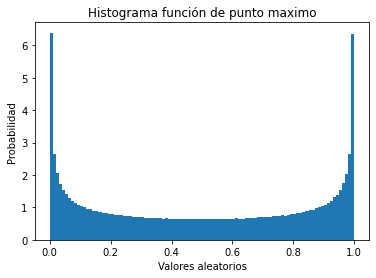

In [34]:
N = 10**6 

x = p_max(N)

plt.hist(x,100,density=True)
plt.xlabel('Valores aleatorios')
plt.ylabel('Probabilidad')
plt.title('Histograma función de punto maximo')
print(np.mean(x))
plt.show()

In [35]:
def Gen_distr_discreta(p_acum: 'P.Acumulada de la distribución a generar',
                       indices: 'valores reales a generar aleatoriamente',
                       N: 'cantidad de números aleatorios a generar'):
    
    U =np.random.rand(N)
  
    rand2reales = {i: idx for i, idx in enumerate(indices)}

    y =pd.Series([sum([1 for p in p_acum if p<ui]) for ui in U]).map(rand2reales)
    return y

In [36]:
def p_acum_binom(n,p):
    Pr = np.zeros(n)
    Pr[0] = (1-p)**n
    def pr(i):
        nonlocal Pr
        c  = p/(1-p)
        Pr[i+1]=(c*(n-i)/(i+1))*Pr[i]
        
 
    [pr(i) for i in range(n-1)]
    return np.cumsum(Pr)

In [37]:
def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
   
    plt.figure(figsize=[10,4])
    y, x = np.histogram(distribucion, bins=len(set(distribucion)), density=densidad) 
    plt.bar(x[1:], y, label=label)
    plt.legend()
    plt.show()

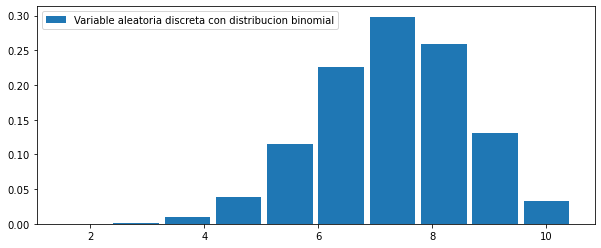

In [38]:
n = 10
p = 0.7
N = 10**4

p_acum = p_acum_binom(n,p)


d_binom = Gen_distr_discreta(p_acum, np.arange(0, n+1), N)

plot_histogram_discrete(d_binom, 'Variable aleatoria discreta con distribucion binomial', True)

Código de solucion estudiante 2

In [40]:
# Código de solución estudiante 2
def p_max(N):
    return (np.sin(np.random.random(N)*np.pi/2))**2


0.4995721957432957


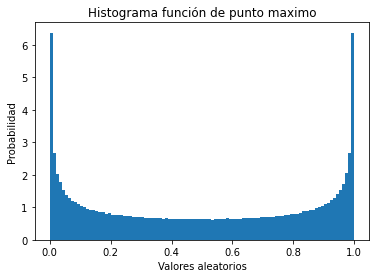

In [41]:
N = 10**6 

x = p_max(N)

plt.hist(x,100,density=True)
plt.xlabel('Valores aleatorios')
plt.ylabel('Probabilidad')
plt.title('Histograma función de punto maximo')
print(np.mean(x))
plt.show()

In [42]:
def Gen_distr_discreta(p_acum: 'P.Acumulada de la distribución a generar',
                       indices: 'valores reales a generar aleatoriamente',
                       N: 'cantidad de números aleatorios a generar'):
    
    U =np.random.rand(N)
  
    rand2reales = {i: idx for i, idx in enumerate(indices)}

    y =pd.Series([sum([1 for p in p_acum if p<ui]) for ui in U]).map(rand2reales)
    return y

In [43]:
def p_acum_binom(n,p):
    Pr = np.zeros(n)
    Pr[0] = (1-p)**n
    def pr(i):
        nonlocal Pr
        c  = p/(1-p)
        Pr[i+1]=(c*(n-i)/(i+1))*Pr[i]
        
 
    [pr(i) for i in range(n-1)]
    return np.cumsum(Pr)

In [44]:
def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
   
    plt.figure(figsize=[10,4])
    y, x = np.histogram(distribucion, bins=len(set(distribucion)), density=densidad) 
    plt.bar(x[1:], y, label=label)
    plt.legend()
    plt.show()

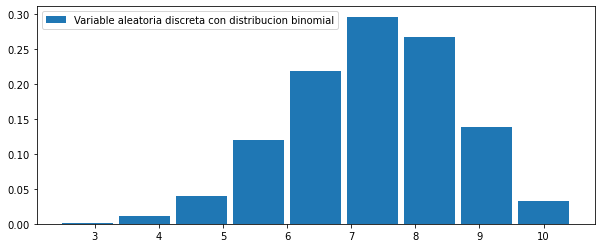

In [45]:
n = 10
p = 0.7
N = 10**4

p_acum = p_acum_binom(n,p)


d_binom = Gen_distr_discreta(p_acum, np.arange(0, n+1), N)

plot_histogram_discrete(d_binom, 'Variable aleatoria discreta con distribucion binomial', True)